<a href="https://www.kaggle.com/mukeshkumar95/k-means-clustering-for-marketing?scriptVersionId=87112826" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-campaign-for-clustering/marketing_campaign.csv


K means clustering is a unsupervised machine learning algorithm.
k= number of clusters you want to find in your data.
k-centroids=mean or average of each cluster
Convergence=Iterate untill points are in their final clusters(every point in the dataset belongs to final cluster)
Reference Vector=Each cluster has a representative point or mean of the data points.(also called centroid)

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **DATA PREPARATION AND CLEANING**

In [3]:
customer_data=pd.read_csv("../input/marketing-campaign-for-clustering/marketing_campaign.csv")
customer_data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
customer_data.sample(8).T

,2091,208,1582,1509,1235,110,754,876
ID,2686,868,3503,10128,843,5077,7723,773
Year_Birth,1969,1966,1950,1958,1971,1979,1979,1971
Education,Basic,Graduation,Graduation,Graduation,Graduation,Graduation,Graduation,Master
Marital_Status,Together,Married,Divorced,Together,Married,Together,Together,Divorced
Income,22390.0,44794.0,82460.0,53977.0,64722.0,77298.0,75507.0,42835.0
Kidhome,0,0,0,0,1,0,0,1
Teenhome,0,1,0,1,0,1,0,1
Dt_Customer,21/10/13,08/06/14,02/12/13,08/06/13,26/05/14,02/11/13,02/05/14,30/06/13
Recency,49,99,78,21,47,46,56,64
MntWines,0,54,255,620,303,425,709,379


In [5]:
customer_data.shape

(2240, 29)

In [6]:
#get rid of the columns which are not continous
customer_data=customer_data.drop(labels=['ID','Education','Marital_Status','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response'],axis=1)

In [7]:
customer_data.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,1957,58138.0,0,0,04/09/12,58,635,88,546,172,88,88,3,8,10,4,7,3,11
1,1954,46344.0,1,1,08/03/14,38,11,1,6,2,1,6,2,1,1,2,5,3,11
2,1965,71613.0,0,0,21/08/13,26,426,49,127,111,21,42,1,8,2,10,4,3,11
3,1984,26646.0,1,0,10/02/14,26,11,4,20,10,3,5,2,2,0,4,6,3,11
4,1981,58293.0,1,0,19/01/14,94,173,43,118,46,27,15,5,5,3,6,5,3,11


In [8]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Dt_Customer          2240 non-null   object 
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [9]:
customer_data['Dt_Customer']=pd.to_datetime(customer_data['Dt_Customer'],format='%d/%m/%y')
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Income               2216 non-null   float64       
 2   Kidhome              2240 non-null   int64         
 3   Teenhome             2240 non-null   int64         
 4   Dt_Customer          2240 non-null   datetime64[ns]
 5   Recency              2240 non-null   int64         
 6   MntWines             2240 non-null   int64         
 7   MntFruits            2240 non-null   int64         
 8   MntMeatProducts      2240 non-null   int64         
 9   MntFishProducts      2240 non-null   int64         
 10  MntSweetProducts     2240 non-null   int64         
 11  MntGoldProds         2240 non-null   int64         
 12  NumDealsPurchases    2240 non-null   int64         
 13  NumWebPurchases      2240 non-nul

In [10]:
#check missing or null values
customer_data.isnull().sum()

Year_Birth              0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Z_CostContact           0
Z_Revenue               0
dtype: int64

In [11]:
customer_data=customer_data.dropna()

In [12]:
customer_data['Total_amount_spent']=customer_data['MntWines']+customer_data['MntFruits']+customer_data['MntMeatProducts']+customer_data['MntFishProducts']+customer_data['MntSweetProducts']+customer_data['MntGoldProds']
customer_data['Total_children']=customer_data['Kidhome']+customer_data['Teenhome']
#number of purchases and visits to the store by customer
customer_data['Customer_purchases_webvisits']=customer_data['NumDealsPurchases']+\
                                              customer_data['NumWebPurchases']+\
                                              customer_data['NumCatalogPurchases']+\
                                              customer_data['NumStorePurchases']+\
                                              customer_data['NumWebVisitsMonth']

In [13]:
#lets only work with the engineered columns and drop the original columns
customer_data=customer_data.drop(labels=['Kidhome','Teenhome','MntWines','MntFruits','MntMeatProducts',
'MntFishProducts' ,'MntSweetProducts','MntGoldProds',
'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'],axis=1)
customer_data.head()

,Year_Birth,Income,Dt_Customer,Recency,Z_CostContact,Z_Revenue,Total_amount_spent,Total_children,Customer_purchases_webvisits
0,1957,58138.0,2012-09-04,58,3,11,1617,0,32
1,1954,46344.0,2014-03-08,38,3,11,27,2,11
2,1965,71613.0,2013-08-21,26,3,11,776,0,25
3,1984,26646.0,2014-02-10,26,3,11,53,1,14
4,1981,58293.0,2014-01-19,94,3,11,422,1,24


In [14]:
#use the singed up date to find out the length of association of the customer with our store
dt=pd.to_datetime('2020/12/31',format='%Y/%m/%d')
#lenth of how long a customer is associated with our store in DAYS
customer_data['Length_of_Association']=(dt-customer_data['Dt_Customer']).dt.days

In [15]:
#get the length of association in month
customer_data['Length_of_Association']=(customer_data['Length_of_Association']/30).astype('int')
customer_data=customer_data.drop(labels='Dt_Customer',axis=1)

In [16]:
customer_data.head()

,Year_Birth,Income,Recency,Z_CostContact,Z_Revenue,Total_amount_spent,Total_children,Customer_purchases_webvisits,Length_of_Association
0,1957,58138.0,58,3,11,1617,0,32,101
1,1954,46344.0,38,3,11,27,2,11,83
2,1965,71613.0,26,3,11,776,0,25,89
3,1984,26646.0,26,3,11,53,1,14,83
4,1981,58293.0,94,3,11,422,1,24,84


In [17]:
#get the current age of the customer
customer_data['Age']=2022-customer_data['Year_Birth']
customer_data.drop('Year_Birth',axis=1,inplace=True)

In [18]:
customer_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.0,99.0
Z_CostContact,2216.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
Z_Revenue,2216.0,11.000000,0.000000,11.0,11.0,11.0,11.0,11.0
Total_amount_spent,2216.0,607.075361,602.900476,5.0,69.0,396.5,1048.0,2525.0
Total_children,2216.0,0.947202,0.749062,0.0,0.0,1.0,1.0,3.0
Customer_purchases_webvisits,2216.0,20.199910,7.283193,0.0,14.0,19.0,25.0,46.0
Length_of_Association,2216.0,90.539711,6.762415,79.0,85.0,91.0,96.0,102.0
Age,2216.0,53.179603,11.985554,26.0,45.0,52.0,63.0,129.0


In [19]:
#There is low standard deviationa and isnt much of distribution in columns (Total_children,Z_CostContact,Z_Revenue)
#remaining columns show good variation
customer_data=customer_data.drop(labels=['Total_children','Z_CostContact','Z_Revenue'],axis=1)

# **DATA EXPLORATION AND VISUALIZATION**

<AxesSubplot:ylabel='Age'>

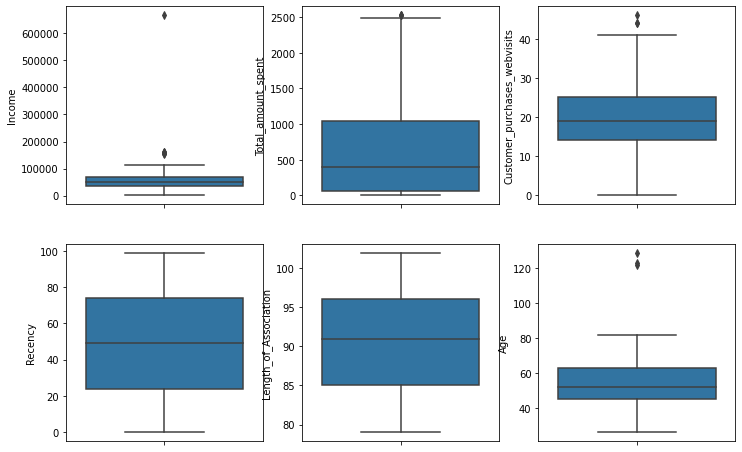

In [20]:
fig,axs=plt.subplots(figsize=(12,8),nrows=2,ncols=3,sharey=False)
sns.boxplot(y=customer_data['Income'],ax=axs[0][0])
sns.boxplot(y=customer_data['Total_amount_spent'],ax=axs[0][1])
sns.boxplot(y=customer_data['Customer_purchases_webvisits'],ax=axs[0][2])
sns.boxplot(y=customer_data['Recency'],ax=axs[1][0])
sns.boxplot(y=customer_data['Length_of_Association'],ax=axs[1][1])
sns.boxplot(y=customer_data['Age'],ax=axs[1][2])

In [21]:
#we have 3 columns with outliers
#we are using clip to only the keep the values that are in the range of 5 percentile to 95 percentile
customer_data['Customer_purchases_webvisits'].clip(
    lower=customer_data['Customer_purchases_webvisits'].quantile(0.05),
    upper=customer_data['Customer_purchases_webvisits'].quantile(0.95),inplace=True)
customer_data['Total_amount_spent'].clip(
    lower=customer_data['Total_amount_spent'].quantile(0.05),
    upper=customer_data['Total_amount_spent'].quantile(0.95),inplace=True)
customer_data['Income'].clip(
    lower=customer_data['Income'].quantile(0.05),
    upper=customer_data['Income'].quantile(0.95),inplace=True)
customer_data['Age'].clip(
    lower=customer_data['Age'].quantile(0.05),
    upper=customer_data['Age'].quantile(0.95),inplace=True)

<AxesSubplot:ylabel='Age'>

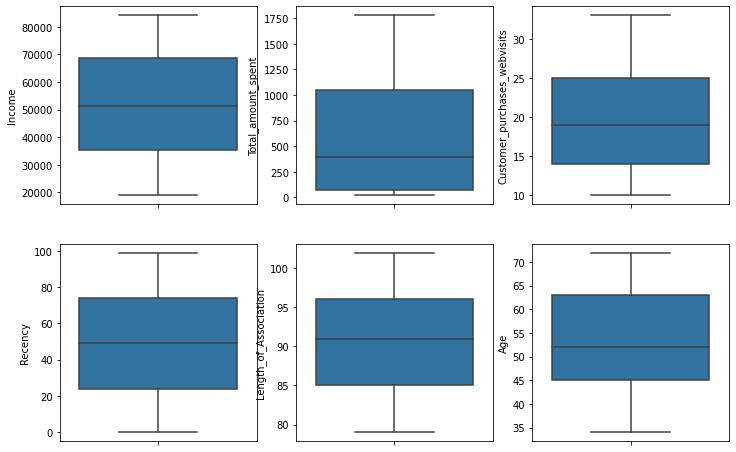

In [22]:
#check with Boxplot
fig,axs=plt.subplots(figsize=(12,8),nrows=2,ncols=3,sharey=False)
sns.boxplot(y=customer_data['Income'],ax=axs[0][0])
sns.boxplot(y=customer_data['Total_amount_spent'],ax=axs[0][1])
sns.boxplot(y=customer_data['Customer_purchases_webvisits'],ax=axs[0][2])
sns.boxplot(y=customer_data['Recency'],ax=axs[1][0])
sns.boxplot(y=customer_data['Length_of_Association'],ax=axs[1][1])
sns.boxplot(y=customer_data['Age'],ax=axs[1][2])

<AxesSubplot:xlabel='Income', ylabel='Total_amount_spent'>

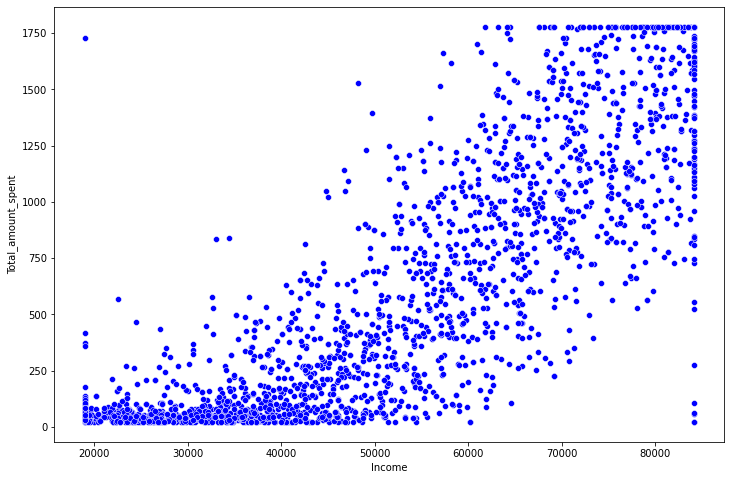

In [23]:
plt.figure(figsize=(12,8))
#scatter plot
sns.scatterplot(x='Income',y='Total_amount_spent',data=customer_data,color='b')

From the above chart we can depict that there is a positive relation between income and total amount spent. Higher the income, more amount spent.

<AxesSubplot:xlabel='Income', ylabel='Total_amount_spent'>

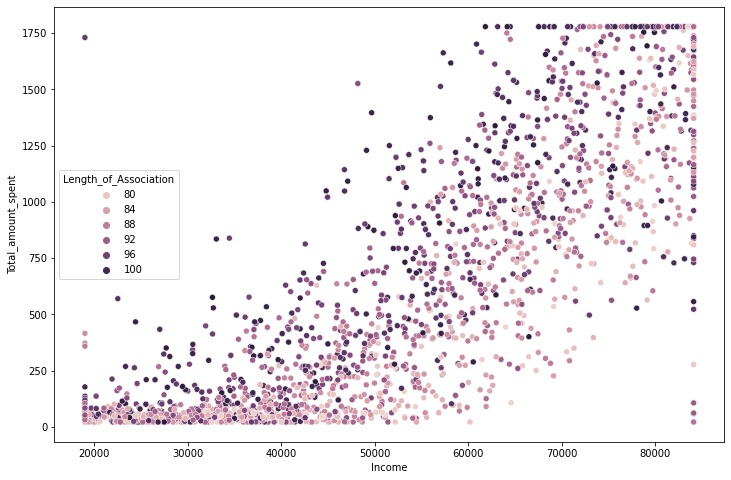

In [24]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='Income',y='Total_amount_spent',hue='Length_of_Association',data=customer_data)

From the above chart we can depict that , customers who have greater length of association with the store, spent more.

<AxesSubplot:xlabel='Income', ylabel='Length_of_Association'>

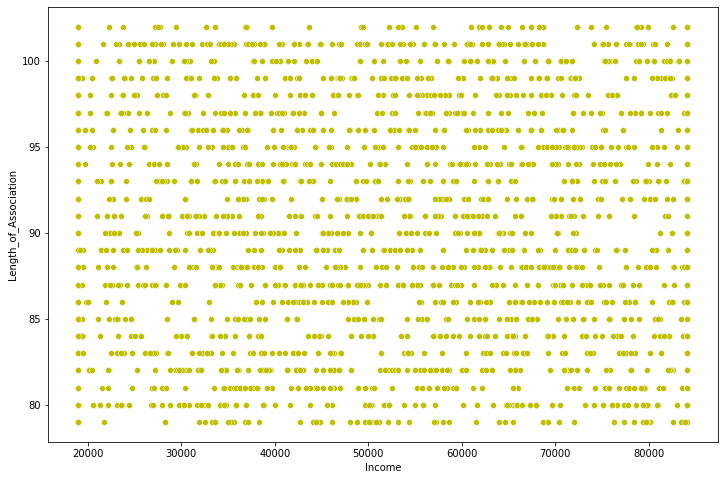

In [25]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='Income',y='Length_of_Association',data=customer_data,color='y')

No clear pattern. 

<AxesSubplot:xlabel='Age', ylabel='Recency'>

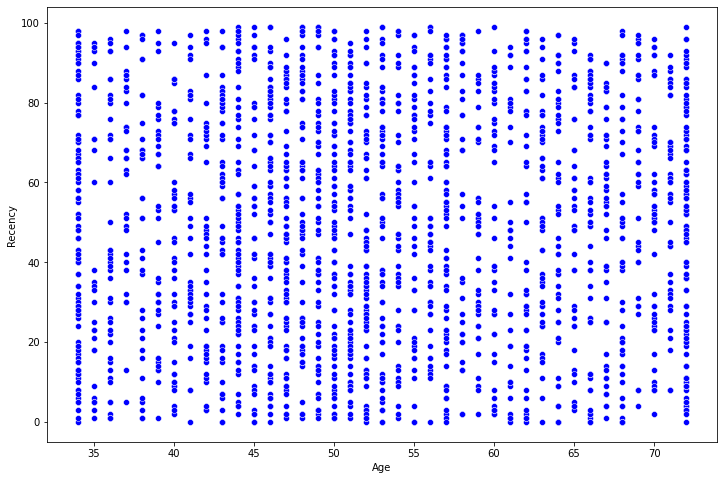

In [26]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='Age',y='Recency',data=customer_data,color='b')

In [27]:
fig=px.scatter_3d(customer_data,x='Length_of_Association',y='Income',z='Total_amount_spent')
fig.show()

Looks like there's some pattern.Lets try with these 3 columns.

In [28]:
#save to csv
customer_data[['Income','Total_amount_spent','Length_of_Association']].to_csv('./preprocessed_data.csv',index=False)

# **STANDARDIZING AND NORMALIZING DATA**

In [29]:
#import sklearn libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize

In [30]:
pre_proc_data=pd.read_csv('./preprocessed_data.csv')
pre_proc_data.head()

,Income,Total_amount_spent,Length_of_Association
0,58138.0,1617.0,101
1,46344.0,27.0,83
2,71613.0,776.0,89
3,26646.0,53.0,83
4,58293.0,422.0,84


In [31]:
pre_proc_data.describe()

,Income,Total_amount_spent,Length_of_Association
count,2216.000000,2216.000000,2216.000000
mean,51751.716832,595.727775,90.539711
std,19773.406544,575.677268,6.762415
min,18985.500000,22.000000,79.000000
25%,35303.000000,69.000000,85.000000
50%,51381.500000,396.500000,91.000000
75%,68522.000000,1048.000000,96.000000
max,84130.000000,1778.250000,102.000000


Mean, and standard deviation are in different ranges.

In [32]:
#if they are at different ranges , clustering will not be effective or robust.
#Scale the data to be expressed in standard deviation
scaler=StandardScaler()
X_std=pd.DataFrame(data=scaler.fit_transform(pre_proc_data),columns=pre_proc_data.columns)
X_std.describe()

,Income,Total_amount_spent,Length_of_Association
count,2.216000e+03,2.216000e+03,2.216000e+03
mean,1.361163e-16,-3.657323e-18,-8.456934e-17
std,1.000226e+00,1.000226e+00,1.000226e+00
min,-1.657459e+00,-9.968385e-01,-1.706834e+00
25%,-8.320483e-01,-9.151771e-01,-8.193762e-01
50%,-1.872719e-02,-3.461536e-01,6.808111e-02
75%,8.483145e-01,7.858123e-01,8.076289e-01
max,1.637836e+00,2.054605e+00,1.695086e+00


In [33]:
#NOrmalization will convert each vector to 1
#we are using L2 normalization(foir every row the sum of the squares of values will be equal to 1)
X=pd.DataFrame(data=normalize(X_std,norm='l2'),columns=X_std.columns)
X.head()
#if you do sum of the squares of the individual values in this vector, you will get 1


,Income,Total_amount_spent,Length_of_Association
0,0.135946,0.746727,0.651090
1,-0.180570,-0.652287,-0.736150
2,0.933081,0.290900,-0.211510
3,-0.656183,-0.487233,-0.576218
4,0.310416,-0.283174,-0.907444


<AxesSubplot:xlabel='Income', ylabel='Length_of_Association'>

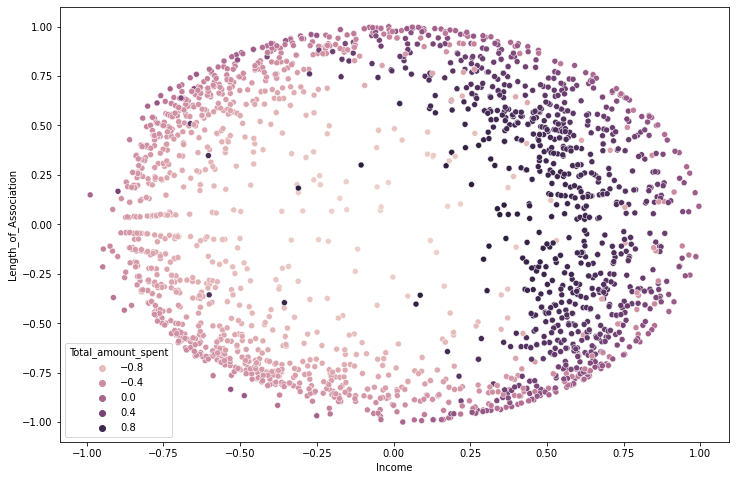

In [34]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='Income',y='Length_of_Association',data=X,hue='Total_amount_spent')

Kmeans clustering wil not tell us right number of clusters to find in our data. so for this reason we wil use couple of heuristics
* Weighted_cluster_sum of_squares=computes the squared average distance of all points within a cluster to the centroid.
* Cluster with low values=tight/more cohesive
* inertia will give us the Weighted_cluster_sum of_squares.

# **PERFORMING K-MEANS CLUSTERING**

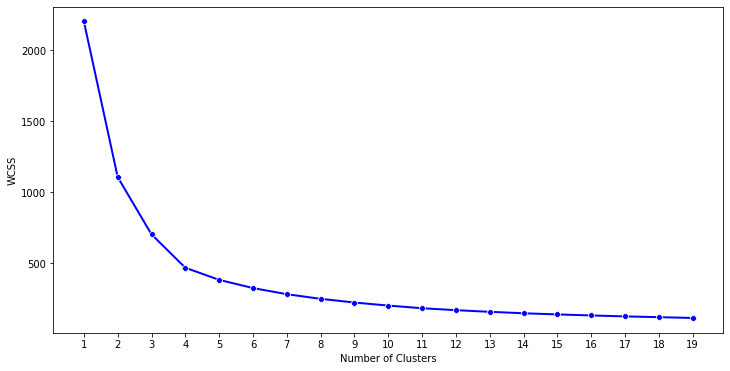

In [35]:
Weighted_cluster_sum_of_squares = []

for k in range(1,20):
    
    kmeans_model=KMeans(n_clusters=k,random_state=123)
    
    kmeans_model.fit(X)
    
    Weighted_cluster_sum_of_squares.append(kmeans_model.inertia_)

plt.figure(figsize=(12,6))
sns.lineplot(x=range(1,20),y=Weighted_cluster_sum_of_squares,linewidth=2,color='blue',marker='8')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(1,20,1))
plt.ylabel('WCSS')
plt.show()

We can see that there is a change from 4th cluster.

Evaluate the cluster.
* Silhouette score- computes silhouette coefficient for each sample.
* Silhouette cofficient for a sample is a measure of hoe similar an object is to objects in its own cluster.And how different is that object from other clusters.
* Silhouette score averages silhouette coefficient of each sample.
* Value ranges from -1 to 1. (1=Good cluster)
* Silhouette scoring doesnt require labelled data.

In [36]:
#evaluate
silhouette_avg=[]

for num_clusters in range(2,20):
    
    kmeans_model=KMeans(n_clusters=num_clusters,random_state=123)
    
    kmeans_model.fit(X)
    
    cluster_labels = kmeans_model.labels_
    
    silhouette_avg.append(silhouette_score(X,cluster_labels))
    
silhouette_avg

[0.4704396189498737,
 0.4669781440957686,
 0.4683471975586241,
 0.4364559824707247,
 0.41614405607122573,
 0.3921452940585594,
 0.40806393726424467,
 0.3801420100025112,
 0.37045423746119793,
 0.38432050230067594,
 0.3695432406003146,
 0.3738076604297303,
 0.35611588266932126,
 0.34582081357716826,
 0.3483922308028467,
 0.35106455022870103,
 0.34560769435003186,
 0.33861984351869445]

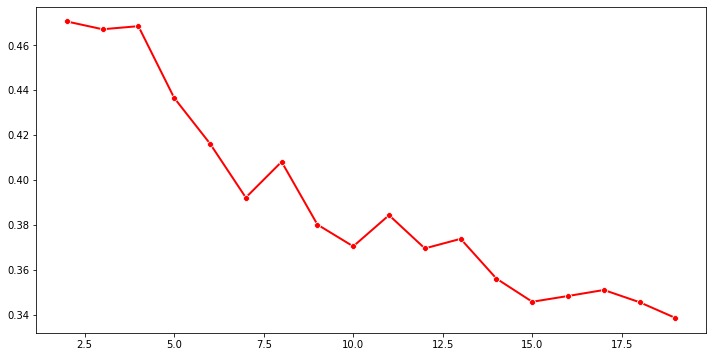

In [37]:
plt.figure(figsize=(12,6))
sns.lineplot(x=range(2,20),y=silhouette_avg,linewidth=2,color='red',marker='8')
plt.show()

Its clear that there is a dip around number of cluster =4 and 6

As we know that a lower value of silhouette_score is indicative of better clustering.

In [38]:
#final Kmeans model with k=4
kmeans_model=KMeans(n_clusters=4,random_state=123)
kmeans_model.fit(X)
X['cluster_labels']=kmeans_model.labels_
#the cluster label indicate which cluster a particular data point belongs to.
X.head()

,Income,Total_amount_spent,Length_of_Association,cluster_labels
0,0.135946,0.746727,0.651090,3
1,-0.180570,-0.652287,-0.736150,2
2,0.933081,0.290900,-0.211510,0
3,-0.656183,-0.487233,-0.576218,2
4,0.310416,-0.283174,-0.907444,0


# **VISUALIZING CLUSTERS**

In [39]:
#we that every cluster has a center/centroid
#Teh average of the data point for each cluster gives us a centroid of cluster
#so if we group by cluster labels and compute the mean, we wil get the centroids that we in the data.
X.groupby('cluster_labels').mean()

,Income,Total_amount_spent,Length_of_Association
cluster_labels,,,
0,0.595593,0.395942,-0.498993
1,-0.496422,-0.490208,0.546616
2,-0.424636,-0.561632,-0.553556
3,0.468234,0.553998,0.522807


In [40]:
#we can also see the cendroids using the following
centers=kmeans_model.cluster_centers_
centers

array([[ 0.5955929 ,  0.39594229, -0.49899326],
       [-0.49642203, -0.49020768,  0.54661603],
       [-0.4246355 , -0.56163158, -0.55355614],
       [ 0.4682336 ,  0.55399791,  0.52280683]])

we can see that , cluster 0 and 3 are quite far apart in space.

In [41]:
#add the cluster data point to the original preprocessed data
pre_proc_data['cluster_labels']=kmeans_model.labels_
#gives us the centroids of the clusters using teh original data
#average of income, total amt spent, length of assoc
#this allows us to identify our customers
pre_proc_data.groupby('cluster_labels').mean()

,Income,Total_amount_spent,Length_of_Association
cluster_labels,,,
0,71769.793177,1047.557569,84.816631
1,35537.686957,187.433043,96.191304
2,37704.769470,120.211838,84.633956
3,68643.659434,1214.864623,96.626415


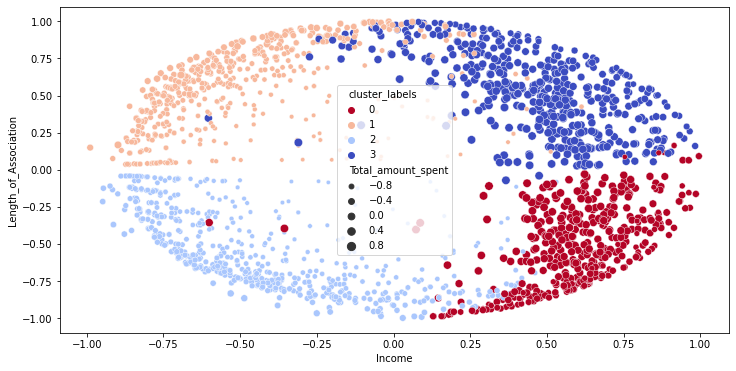

In [42]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Income',y='Length_of_Association',size='Total_amount_spent',hue='cluster_labels',data=X,palette='coolwarm_r')
plt.show()
#shows how our clusters are spread out in space

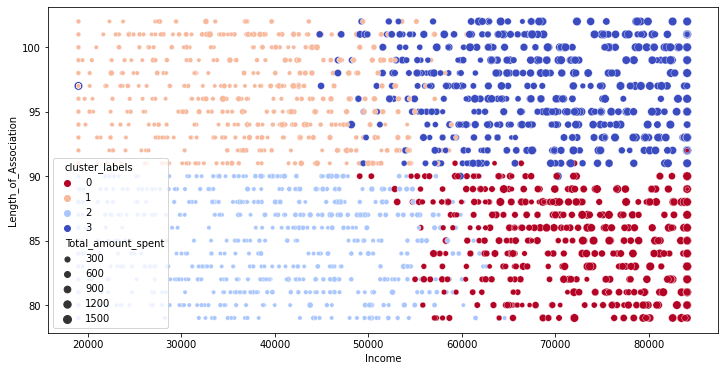

In [43]:
#lets look with the preprocessed data
plt.figure(figsize=(12,6))
sns.scatterplot(x='Income',y='Length_of_Association',size='Total_amount_spent',hue='cluster_labels',data=pre_proc_data,palette='coolwarm_r')
plt.show()

In [44]:
fig=px.scatter_3d(X,x='Length_of_Association',y='Income',z='Total_amount_spent',color='cluster_labels')
fig.show()

With this we can clearly see that , clusters are seperated(similar in terms of income, total amt spent and length of associaion.)